In [1]:
import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"
import time
import tensorflow as tf
import numpy as np
from glob import glob
import datetime
import random
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

2023-11-01 18:33:10.229401: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 18:33:10.229503: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 18:33:10.229595: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-01 18:33:10.247890: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

2023-11-01 18:33:12.128063: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-01 18:33:12.135012: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-01 18:33:12.135060: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
tf.debugging.set_log_device_placement(True)

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
print(tf.__version__)

2.14.0


In [7]:
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


2023-11-01 18:33:12.175927: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-01 18:33:12.176009: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-01 18:33:12.176038: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-01 18:33:12.439346: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-01 18:33:12.439399: I tensorflow/compile

In [8]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8576312583650781456
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7917797376
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12850322022772943963
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:07:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2023-11-01 18:33:12.447517: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-01 18:33:12.447592: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-01 18:33:12.447614: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-01 18:33:12.447801: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-01 18:33:12.447814: I tensorflow/core/co

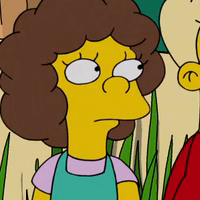

In [9]:
import PIL
image="./simpsons_dataset/cropped/1008.png"
img=PIL.Image.open(image)
img

In [10]:
# os.makedirs("resized_images/cropped", exist_ok=True)

In [11]:
def resize_image(input_image_path, output_image_path, size):
    original_image = Image.open(input_image_path)
    width, height = original_image.size
    print(f"The original image size is {width} wide x {height} tall")

    resized_image = original_image.resize(size)
    width, height = resized_image.size
    print(f"The resized image size is {width} wide x {height} tall")
    resized_image.show()
    resized_image.save(output_image_path)


In [12]:
# # Define el directorio de imágenes originales
# input_dir = "./simpsons_dataset/cropped/"

# # Define el directorio de imágenes redimensionadas
# output_dir = "./resized_images/cropped/"

# # Obtiene una lista de todas las imágenes
# images = os.listdir(input_dir)

# # Recorre las imágenes
# for image in images:
#     # Abre una imagen
#     img = Image.open(input_dir + image)
#     # Redimensiona la imagen
#     imgResize = img.resize((32,32))
#     # Guarda la imagen redimensionada
#     imgResize.save(output_dir + image)

In [13]:
# Paths
INPUT_DATA_DIR = "./resized_images/cropped/"
# OUTPUT_DIR = './{date:%Y-%m-%d_%H:%M:%S}/'.format(date=datetime.datetime.now())
# if not os.path.exists(OUTPUT_DIR):
#     os.makedirs(OUTPUT_DIR)
OUTPUT_DIR = ""

In [14]:
# Hyperparameters
IMAGE_SIZE = 128
NOISE_SIZE = 100
LR_D = 0.00004
LR_G = 0.0004
BATCH_SIZE = 16
EPOCHS = 60 # For better results increase this value 
BETA1 = 0.5
WEIGHT_INIT_STDDEV = 0.02
EPSILON = 0.00005
SAMPLES_TO_SHOW = 5

# CONSTUIR EL GENERADOR Y DISCRIMINADOR

In [15]:
def generator(z, output_channel_dim, training):
    
    with tf.variable_scope("generator", reuse= not training):
        
        # 8x8x1024
        fully_connected = tf.layers.dense(z, 8*8*1024)
        fully_connected = tf.reshape(fully_connected, (-1, 8, 8, 1024))
        fully_connected = tf.nn.leaky_relu(fully_connected)

        # 8x8x1024 -> 16x16x512
        trans_conv1 = tf.layers.conv2d_transpose(inputs=fully_connected,
                                                filters=512,
                                                kernel_size=[5,5],
                                                strides=[2,2],
                                                padding="SAME",
                                                name="trans_conv1")
        batch_trans_conv1 = tf.layers.batch_normalization(inputs = trans_conv1,
                                                        training=training,
                                                        epsilon=EPSILON,
                                                        name="batch_trans_conv1")
        trans_conv1_out = tf.nn.leaky_relu(batch_trans_conv1,
                                        name="trans_conv1_out")
        
        # 16x16x512 -> 32x32x256
        trans_conv2 = tf.layers.conv2d_transpose(inputs=trans_conv1_out,
                                                filters=256,
                                                kernel_size=[5,5],
                                                strides=[2,2],
                                                padding="SAME",
                                                name="trans_conv2")
        batch_trans_conv2 = tf.layers.batch_normalization(inputs = trans_conv2,
                                                        training=training,
                                                        epsilon=EPSILON,
                                                        name="batch_trans_conv2")
        trans_conv2_out = tf.nn.leaky_relu(batch_trans_conv2,
                                        name="trans_conv2_out")
        
        # 32x32x256 -> 64x64x128
        trans_conv3 = tf.layers.conv2d_transpose(inputs=trans_conv2_out,
                                                filters=128,
                                                kernel_size=[5,5],
                                                strides=[2,2],
                                                padding="SAME",
                                                name="trans_conv3")
        batch_trans_conv3 = tf.layers.batch_normalization(inputs = trans_conv3,
                                                        training=training,
                                                        epsilon=EPSILON,
                                                        name="batch_trans_conv3")
        trans_conv3_out = tf.nn.leaky_relu(batch_trans_conv3,
                                        name="trans_conv3_out")
        
        # 64x64x128 -> 128x128x64
        trans_conv4 = tf.layers.conv2d_transpose(inputs=trans_conv3_out,
                                                filters=64,
                                                kernel_size=[5,5],
                                                strides=[2,2],
                                                padding="SAME",
                                                name="trans_conv4")
        batch_trans_conv4 = tf.layers.batch_normalization(inputs = trans_conv4,
                                                        training=training,
                                                        epsilon=EPSILON,
                                                        name="batch_trans_conv4")
        trans_conv4_out = tf.nn.leaky_relu(batch_trans_conv4,
                                        name="trans_conv4_out")
        
        # 128x128x64 -> 128x128x3
        logits = tf.layers.conv2d_transpose(inputs=trans_conv4_out,
                                            filters=3,
                                            kernel_size=[5,5],
                                            strides=[1,1],
                                            padding="SAME",
                                            name="logits")
        out = tf.tanh(logits, name="out")
        return out



In [16]:
def discriminator(x, reuse):
    # with tf.device('/device:GPU:0'):

    with tf.variable_scope("discriminator", reuse=reuse): 
        
        # 128*128*3 -> 64x64x64 
        conv1 = tf.layers.conv2d(inputs=x,
                                filters=64,
                                kernel_size=[5,5],
                                strides=[2,2],
                                padding="SAME",
                                name='conv1')
        batch_norm1 = tf.layers.batch_normalization(conv1,
                                                    training=True,
                                                    epsilon=EPSILON,
                                                    name='batch_norm1')
        conv1_out = tf.nn.leaky_relu(batch_norm1,
                                    name="conv1_out")
        
        # 64x64x64-> 32x32x128 
        conv2 = tf.layers.conv2d(inputs=conv1_out,
                                filters=128,
                                kernel_size=[5, 5],
                                strides=[2, 2],
                                padding="SAME",
                                name='conv2')
        batch_norm2 = tf.layers.batch_normalization(conv2,
                                                    training=True,
                                                    epsilon=EPSILON,
                                                    name='batch_norm2')
        conv2_out = tf.nn.leaky_relu(batch_norm2,
                                    name="conv2_out")
        
        # 32x32x128 -> 16x16x256  
        conv3 = tf.layers.conv2d(inputs=conv2_out,
                                filters=256,
                                kernel_size=[5, 5],
                                strides=[2, 2],
                                padding="SAME",
                                name='conv3')
        batch_norm3 = tf.layers.batch_normalization(conv3,
                                                    training=True,
                                                    epsilon=EPSILON,
                                                    name='batch_norm3')
        conv3_out = tf.nn.leaky_relu(batch_norm3,
                                    name="conv3_out")
        
        # 16x16x256 -> 16x16x512
        conv4 = tf.layers.conv2d(inputs=conv3_out,
                                filters=512,
                                kernel_size=[5, 5],
                                strides=[1, 1],
                                padding="SAME",
                                name='conv4')
        batch_norm4 = tf.layers.batch_normalization(conv4,
                                                    training=True,
                                                    epsilon=EPSILON,
                                                    name='batch_norm4')
        conv4_out = tf.nn.leaky_relu(batch_norm4,
                                    name="conv4_out")
        
        # 16x16x512 -> 8x8x1024
        conv5 = tf.layers.conv2d(inputs=conv4_out,
                                filters=1024,
                                kernel_size=[5, 5],
                                strides=[2, 2],
                                padding="SAME",
                                name='conv5')
        batch_norm5 = tf.layers.batch_normalization(conv5,
                                                    training=True,
                                                    epsilon=EPSILON,
                                                    name='batch_norm5')
        conv5_out = tf.nn.leaky_relu(batch_norm5,
                                    name="conv5_out")

        flatten = tf.reshape(conv5_out, (-1, 8*8*1024))
        logits = tf.layers.dense(inputs=flatten,
                                units=1,
                                activation=None)
        out = tf.sigmoid(logits)
        return out, logits


# Modelo de perdida

In [17]:
def model_loss(input_real, input_z, output_channel_dim):
    g_model = generator(input_z, output_channel_dim, True)

    noisy_input_real = input_real + tf.random_normal(shape=tf.shape(input_real),
                                                     mean=0.0,
                                                     stddev=random.uniform(0.0, 0.1),
                                                     dtype=tf.float32)
    
    d_model_real, d_logits_real = discriminator(noisy_input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,
                                                                         labels=tf.ones_like(d_model_real)*random.uniform(0.9, 1.0)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                                         labels=tf.zeros_like(d_model_fake)))
    d_loss = tf.reduce_mean(0.5 * (d_loss_real + d_loss_fake))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                                    labels=tf.ones_like(d_model_fake)))
    return d_loss, g_loss


In [18]:
def model_optimizers(d_loss, g_loss):
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith("generator")]
    d_vars = [var for var in t_vars if var.name.startswith("discriminator")]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    gen_updates = [op for op in update_ops if op.name.startswith('generator')]
    
    with tf.control_dependencies(gen_updates):
        d_train_opt = tf.train.AdamOptimizer(learning_rate=LR_D, beta1=BETA1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate=LR_G, beta1=BETA1).minimize(g_loss, var_list=g_vars)  
    return d_train_opt, g_train_opt


In [19]:
def model_inputs(real_dim, z_dim):
    inputs_real = tf.placeholder(tf.float32, (None, *real_dim), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate_G = tf.placeholder(tf.float32, name="lr_g")
    learning_rate_D = tf.placeholder(tf.float32, name="lr_d")
    return inputs_real, inputs_z, learning_rate_G, learning_rate_D


In [20]:
def show_samples(sample_images, name, epoch):
    figure, axes = plt.subplots(1, len(sample_images), figsize = (IMAGE_SIZE, IMAGE_SIZE))
    for index, axis in enumerate(axes):
        axis.axis('off')
        image_array = sample_images[index]
        axis.imshow(image_array)
        image = Image.fromarray(image_array)
        image.save("results/"+name+"_"+str(epoch)+"_"+str(index)+".png") 
    plt.savefig("results/"+name+"_"+str(epoch)+".png", bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()


In [21]:
def test(sess, input_z, out_channel_dim, epoch):
    example_z = np.random.uniform(-1, 1, size=[SAMPLES_TO_SHOW, input_z.get_shape().as_list()[-1]])
    samples = sess.run(generator(input_z, out_channel_dim, False), feed_dict={input_z: example_z})
    sample_images = [((sample + 1.0) * 127.5).astype(np.uint8) for sample in samples]
    show_samples(sample_images, OUTPUT_DIR + "samples", epoch)


In [22]:
def summarize_epoch(epoch, duration, sess, d_losses, g_losses, input_z, data_shape):
    minibatch_size = int(data_shape[0]//BATCH_SIZE)
    print("Epoch {}/{}".format(epoch, EPOCHS),
          "\nDuration: {:.5f}".format(duration),
          "\nD Loss: {:.5f}".format(np.mean(d_losses[-minibatch_size:])),
          "\nG Loss: {:.5f}".format(np.mean(g_losses[-minibatch_size:])))
    fig, ax = plt.subplots()
    plt.plot(d_losses, label='Discriminator', alpha=0.6)
    plt.plot(g_losses, label='Generator', alpha=0.6)
    plt.title("Losses")
    plt.legend()
    plt.savefig("results/losses_" + str(epoch) + ".png") 
    plt.show()
    plt.close()
    test(sess, input_z, data_shape[3], epoch)


In [23]:
def get_batches(data):
    batches = []
    for i in range(int(data.shape[0]//BATCH_SIZE)):
        batch = data[i * BATCH_SIZE:(i + 1) * BATCH_SIZE]
        augmented_images = []
        for img in batch:
            image = Image.fromarray(img)
            if random.choice([True, False]):
                image = image.transpose(Image.FLIP_LEFT_RIGHT)
            augmented_images.append(np.asarray(image))
        batch = np.asarray(augmented_images)
        normalized_batch = (batch / 127.5) - 1.0
        batches.append(normalized_batch)
    print ("batches: " + str(len(batches)))
    return batches


In [24]:
from tqdm import tqdm
# @tf.device('/device:GPU:0')
def train(get_batches, data_shape, checkpoint_to_load=None):
    input_images, input_z, lr_G, lr_D = model_inputs(data_shape[1:], NOISE_SIZE)
    d_loss, g_loss = model_loss(input_images, input_z, data_shape[3])
    d_opt, g_opt = model_optimizers(d_loss, g_loss)
    
    with tf.compat.v1.Session() as sess:
        sess.run(tf.compat.v1.global_variables_initializer())
        epoch = 0
        iteration = 0
        d_losses = []
        g_losses = []
        
        for epoch in range(EPOCHS):        
            epoch += 1
            start_time = time.time()

            #  Aquí se crea la barra de progreso con tqdm
            with tqdm(total=len(get_batches), desc="Epoch {}/{}".format(epoch, EPOCHS), unit='batches') as pbar:
                for batch_images in get_batches:
                    iteration += 1
                    batch_z = np.random.uniform(-1, 1, size=(BATCH_SIZE, NOISE_SIZE))
                    _ = sess.run(d_opt, feed_dict={input_images: batch_images, input_z: batch_z, lr_D: LR_D})
                    _ = sess.run(g_opt, feed_dict={input_images: batch_images, input_z: batch_z, lr_G: LR_G})
                    d_losses.append(d_loss.eval({input_z: batch_z, input_images: batch_images}))
                    g_losses.append(g_loss.eval({input_z: batch_z}))

                    # Aquí se actualiza la barra de progreso
                    pbar.set_postfix({"D Loss": np.mean(d_losses[-iteration:]), "G Loss": np.mean(g_losses[-iteration:])})
                    pbar.update()

            summarize_epoch(epoch, time.time()-start_time, sess, d_losses, g_losses, input_z, data_shape)


In [25]:
def add_noise(img):
    VARIABILITY=50
    deviation=VARIABILITY*random.random()
    noise=np.random.normal(0,deviation,img.shape)
    img+=noise
    np.clip(img,0.,255.)
    return(img)

Starting the training
Input: (9877, 128, 128, 3)


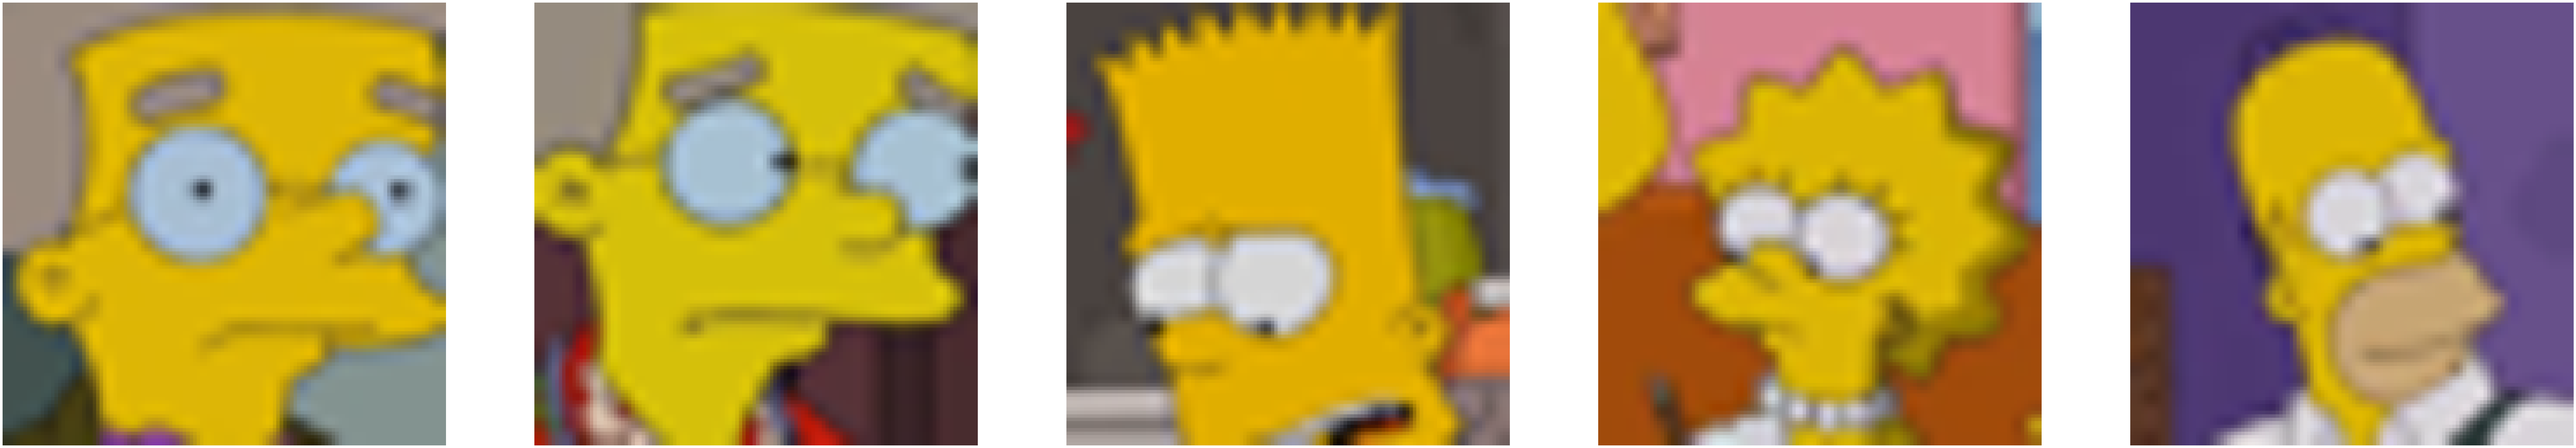

batches: 617
batch recieved: 617
Instructions for updating:
Colocations handled automatically by placer.


/tmp/ipykernel_30915/1366503339.py:3: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  fully_connected = tf.layers.dense(z, 8*8*512)
/tmp/ipykernel_30915/1366503339.py:7: UserWarning: `tf.layers.conv2d_transpose` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2DTranspose` instead.
  trans_conv1 = tf.layers.conv2d_transpose(inputs=fully_connected,
/tmp/ipykernel_30915/1366503339.py:13: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  batch_trans_conv1 = tf.layers.batch_normalization(inputs = trans_conv1,
/tmp/ipykernel_30915/1366503339.py:20: UserWarning: `tf.layers.conv2d_transpose` is deprecated and will be 

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:07:00.0, compute capability: 8.6



2023-11-01 18:33:24.283063: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-01 18:33:24.283147: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-01 18:33:24.283170: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-01 18:33:24.283594: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-01 18:33:24.283646: I tensorflow/core/co

generator/dense/kernel/Initializer/random_uniform/RandomUniform: (RandomUniform): /job:localhost/replica:0/task:0/device:GPU:0
generator/dense/kernel/Initializer/random_uniform/sub: (Sub): /job:localhost/replica:0/task:0/device:GPU:0
generator/dense/kernel/Initializer/random_uniform/mul: (Mul): /job:localhost/replica:0/task:0/device:GPU:0
generator/dense/kernel/Initializer/random_uniform: (AddV2): /job:localhost/replica:0/task:0/device:GPU:0
generator/dense/kernel: (VariableV2): /job:localhost/replica:0/task:0/device:GPU:0
generator/dense/kernel/Assign: (Assign): /job:localhost/replica:0/task:0/device:GPU:0
generator/dense/kernel/read: (Identity): /job:localhost/replica:0/task:0/device:GPU:0
generator/dense/bias/Initializer/zeros: (Fill): /job:localhost/replica:0/task:0/device:GPU:0
generator/dense/bias: (VariableV2): /job:localhost/replica:0/task:0/device:GPU:0
generator/dense/bias/Assign: (Assign): /job:localhost/replica:0/task:0/device:GPU:0
generator/dense/bias/read: (Identity): /j

Epoch 1/60:   0%|          | 0/617 [00:00<?, ?batches/s]

: 

In [26]:
print("Starting the training")
input_images = np.asarray([np.asarray(Image.open(file).resize((IMAGE_SIZE, IMAGE_SIZE))) for file in glob(INPUT_DATA_DIR + '*')])

# dataset = tf.data.Dataset.from_tensor_slices(input_images)
# dataset = dataset.shuffle(buffer_size=1024).batch(BATCH_SIZE)
# dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

print ("Input: " + str(input_images.shape))

np.random.shuffle(input_images)

sample_images = random.sample(list(input_images), SAMPLES_TO_SHOW)
show_samples(sample_images, OUTPUT_DIR + "inputs", 0)

with tf.Graph().as_default():
    batch = get_batches(input_images)
    print("batch recieved: "+str(len(batch)))
    train(batch, input_images.shape)